<a href="https://colab.research.google.com/github/ashutosh1608/face_mask_detector/blob/master/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Click on the connect button on the top right

Run all the code cells untill mentioned below. You can run the cells by clicking on the cell and then pressing 'shift + enter'

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14285, done.
remote: Total 14285 (delta 0), reused 0 (delta 0), pack-reused 14285
Receiving objects: 100% (14285/14285), 12.84 MiB | 12.90 MiB/s, done.
Resolving deltas: 100% (9748/9748), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [4]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [5]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline
 
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
 
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
 
# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
 
# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

This is the [link](https://drive.google.com/drive/folders/1b3W6ArzI57fGtKDXOHRmrfsh6v9Xd2Fa?usp=sharing) to the drive folder, copy this folder to your drive and then click on the link below and connect your drive to the colab notebook, a code will be generated, copy that code to the text field and press enter

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
!ln -s "/content/drive/My Drive/Face Mask Detection/" /short

In [8]:
!ls /short/backup

yolov3_custom_10000.weights  yolov3_custom_15000.weights
yolov3_custom_11000.weights  yolov3_custom_16000.weights
yolov3_custom_12000.weights  yolov3_custom_9000.weights
yolov3_custom_13000.weights  yolov3_custom_final.weights
yolov3_custom_14000.weights  yolov3_custom_last.weights


In [9]:
!cp /short/obj.zip ../

In [ ]:
!ls

3rdparty   CMakeLists.txt	   image_yolov3.sh	  README.md
backup	   darknet		   include		  results
build	   DarknetConfig.cmake.in  json_mjpeg_streams.sh  scripts
build.ps1  darknet.py		   LICENSE		  src
build.sh   darknet_video.py	   Makefile		  video_v2.sh
cfg	   data			   net_cam_v3.sh	  video_yolov3.sh
cmake	   image_yolov2.sh	   obj


In [10]:
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
  inflating: data/obj/0.jpg          
  inflating: data/obj/0.txt          
  inflating: data/obj/10.jpg         
  inflating: data/obj/10.txt         
  inflating: data/obj/100.jpg        
  inflating: data/obj/100.txt        
  inflating: data/obj/101.jpg        
  inflating: data/obj/101.txt        
  inflating: data/obj/102.jpg        
  inflating: data/obj/102.txt        
  inflating: data/obj/103.jpg        
  inflating: data/obj/103.txt        
  inflating: data/obj/104.jpg        
  inflating: data/obj/104.txt        
  inflating: data/obj/105.jpg        
  inflating: data/obj/105.txt        
  inflating: data/obj/106.jpg        
  inflating: data/obj/106.txt        
  inflating: data/obj/107.jpg        
  inflating: data/obj/107.txt        
  inflating: data/obj/108.jpg        
  inflating: data/obj/108.txt        
  inflating: data/obj/109.jpg        
  inflating: data/obj/109.txt        
  inflating: data/obj/11.jpg         
  inflating: data/obj/11.txt 

In [11]:
!ls cfg

9k.labels				    resnet50.cfg
9k.names				    resnext152-32x4d.cfg
9k.tree					    rnn.cfg
alexnet.cfg				    rnn.train.cfg
cd53paspp-gamma.cfg			    strided.cfg
cifar.cfg				    t1.test.cfg
cifar.test.cfg				    tiny.cfg
coco9k.map				    tiny-yolo.cfg
coco.data				    tiny-yolo-voc.cfg
coco.names				    tiny-yolo_xnor.cfg
combine9k.data				    vgg-16.cfg
crnn.train.cfg				    vgg-conv.cfg
csdarknet53-omega.cfg			    voc.data
csresnext50-panet-spp.cfg		    writing.cfg
csresnext50-panet-spp-original-optimal.cfg  yolo.2.0.cfg
darknet19_448.cfg			    yolo9000.cfg
darknet19.cfg				    yolo.cfg
darknet53_448_xnor.cfg			    yolov1
darknet53.cfg				    yolov2.cfg
darknet.cfg				    yolov2-tiny.cfg
densenet201.cfg				    yolov2-tiny-voc.cfg
efficientnet_b0.cfg			    yolov2-voc.cfg
efficientnet-lite3.cfg			    yolov3_5l.cfg
enet-coco.cfg				    yolov3.cfg
extraction22k.cfg			    yolov3.coco-giou-12.cfg
extraction.cfg				    yolov3-openimages.cfg
extraction.conv.cfg			    yolov3-spp.cfg
Gaussia

In [ ]:
#!cp cfg/yolov3.cfg /short/yolov3_custom.cfg

In [12]:
!cp /short/yolov3_custom.cfg cfg/yolov3_custom.cfg

In [ ]:
#!cp data/obj.names /short/obj.names

In [ ]:
#!cp data/obj.data /short/obj.data

In [13]:
!cp /short/obj.names data/obj.names

In [14]:
!cp /short/obj.data data/obj.data

In [15]:
!python /short/generate_train.py

Don't run this cell

In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-07-08 13:42:44--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-07-08 13:42:45--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   244KB/s    in 15m 18s 

2020-07-08 13:58:05 (173 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



### Don't run this cell

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 110685, rewritten_bbox = 0.060532 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.734594, GIOU: 0.727743), Class: 0.929473, Obj: 0.453059, No Obj: 0.001236, .5R: 1.000000, .75R: 0.500000, count: 4, class_loss = 0.547955, iou_loss = 0.288024, total_loss = 0.835980 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000005, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000006, iou_loss = 0.000000, total_loss = 0.000006 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000001, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000002, iou_loss = 0.000000, total_loss = 0.000002 
 total_bbox = 110689, rewritten_bbox = 0.060530 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.677927, GIOU:

### Run the below cells

In [16]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


There are folders named masked and unmasked in the folder whose link was given above, expand those folders in the files section on the left and copy the path of images you want to try by right clicking on them or clicking on the 3 dots ahead of them and paste that path in place of the path inside "" and run the cell, it will take 10 - 30 secs to run

In [18]:
!ls /short/unmasked/

10531.people.jpg
_111412132_62fb234a-6714-4eee-8cfc-ebd625bd58ba.jpg
9c82c7a0-0963-4b57-a4a8-bc4a9cf5d0b0-large16x9_GettyImages1134307248.jpg
friends_on-city-street-having-fun-732x549-thumbnail.jpg
GroupPhoto-1071x1260.jpg
kenya-warriors-1024x675.jpg
maxresdefault.jpg
most-googled-people-2019-111219.jpg
RTS32QJR.jpg


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 152 x

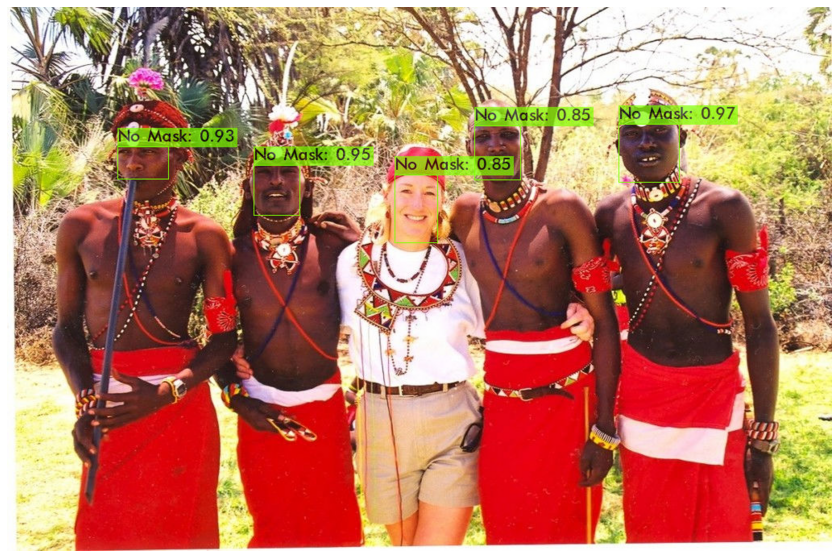

In [19]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /short/backup/yolov3_custom_final.weights /short/unmasked/kenya-warriors-1024x675.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 152 x

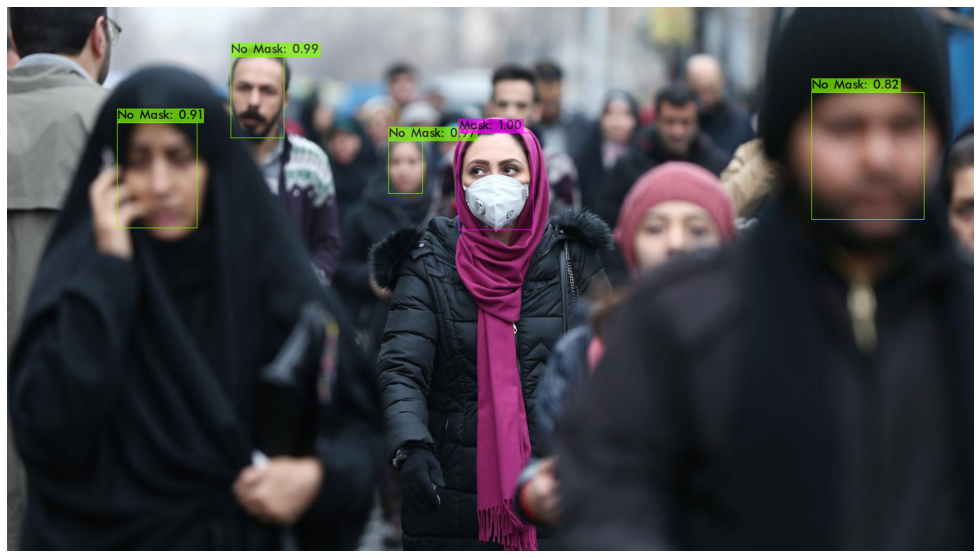

In [20]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /short/backup/yolov3_custom_final.weights /short/unmasked/RTS32QJR.jpg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /short/backup/yolov3_custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.859566, GIOU: 0.859566), Class: 0.999993, Obj: 0.983571, No Obj: 0.000056, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.000071, iou_loss = 0.007275, total_loss = 0.007347 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.515918, GIOU: 0.477692), Class: 0.718583, Obj: 0.000002, No Obj: 0.000001, .5R: 1.000000, .75R: 0.000000, count: 1, class_loss = 0.275873, iou_loss = 0.257984, total_loss = 0.533858 
 total_bbox = 7888, rewritten_bbox = 0.038032 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.873107, GIOU: 0.868694), Class: 0.999752, Obj: 0.987263, No Obj: 0.001585, .5R: 1.000000, .75R: 1.000000, count: 4, class_loss = 0.007917, iou_loss = 0.098254, total_loss = 0.106171 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /short/backup/yolov3_custom_last.weights -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
valid: Using default 'data/train.txt'
yolov3_custom
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Sho

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 152 x

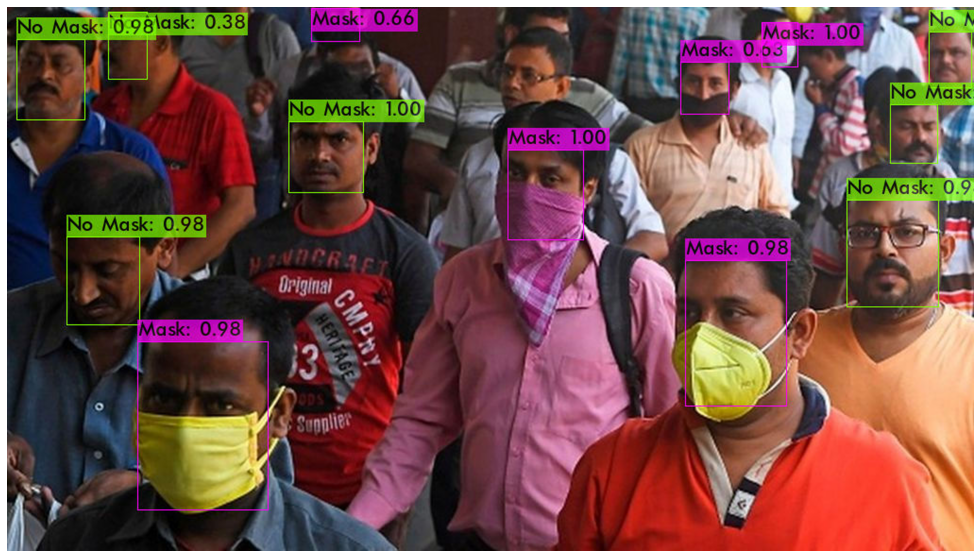

In [21]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /short/backup/yolov3_custom_final.weights /short/unmasked/_111412132_62fb234a-6714-4eee-8cfc-ebd625bd58ba.jpg -thresh 0.3
imShow('predictions.jpg')